In [38]:
from utils.graphutils import Graph, Node, create_county_adjacency_dict_fips, create_voting_data_list
import networkx as nx
import random
from utils.polya_process import polya
import time
import matplotlib.pyplot as plt
import utils.population
import pandas as pd
from utils.voting_utils import *


In [39]:

#Set Initial Values
state_to_graph = 'Florida'
start_year = 2016   # Note: year MUST be a multiple of 4
end_year = 2004

#Get County Adjacency Matrix
neighbours = create_county_adjacency_dict_fips("data\countyadj.csv")
#populations = population.get_population_data(state=state_name,year=start_year)

#Get FIPS (IDs) data for every county
county_fips = pd.read_csv('data/fips.csv',dtype=str, encoding='utf-8').set_index(["STATE","COUNTY"]).drop_duplicates()

#Get voting data
voting_path = "data\countypres.csv"
voting_data = get_votes(pd.read_csv(voting_path), 2016)


#Define Graph variable
county_graph = Graph()

# Initialize graph: 
# - set population, red, blue in each node
# - connect nodes using adjacency matrix
for county in neighbours:
    county_name = county_fips.loc[(county[:2],county[2:])]['CTYNAME']
    state_name = county_fips.loc[(county[:2],county[2:])]['STNAME']
    #print(f"{state_name} {county_name}")

    population = random.uniform(500,10000)  #Eventually, will be = populations[state][county]
    red = voting_data[county]['red']
    blue = voting_data[county]['blue']
    county_graph.add_node(Node(
            id=county,
            county=county_name,
            state=state_name,
            red=red,
            blue=blue,
            population=population,
            neighbours = neighbours[county],
            reinforcement_parameter=10 #This is the initial reinforcement parameter. Will be overwritten once we have the birth function going.
    ))


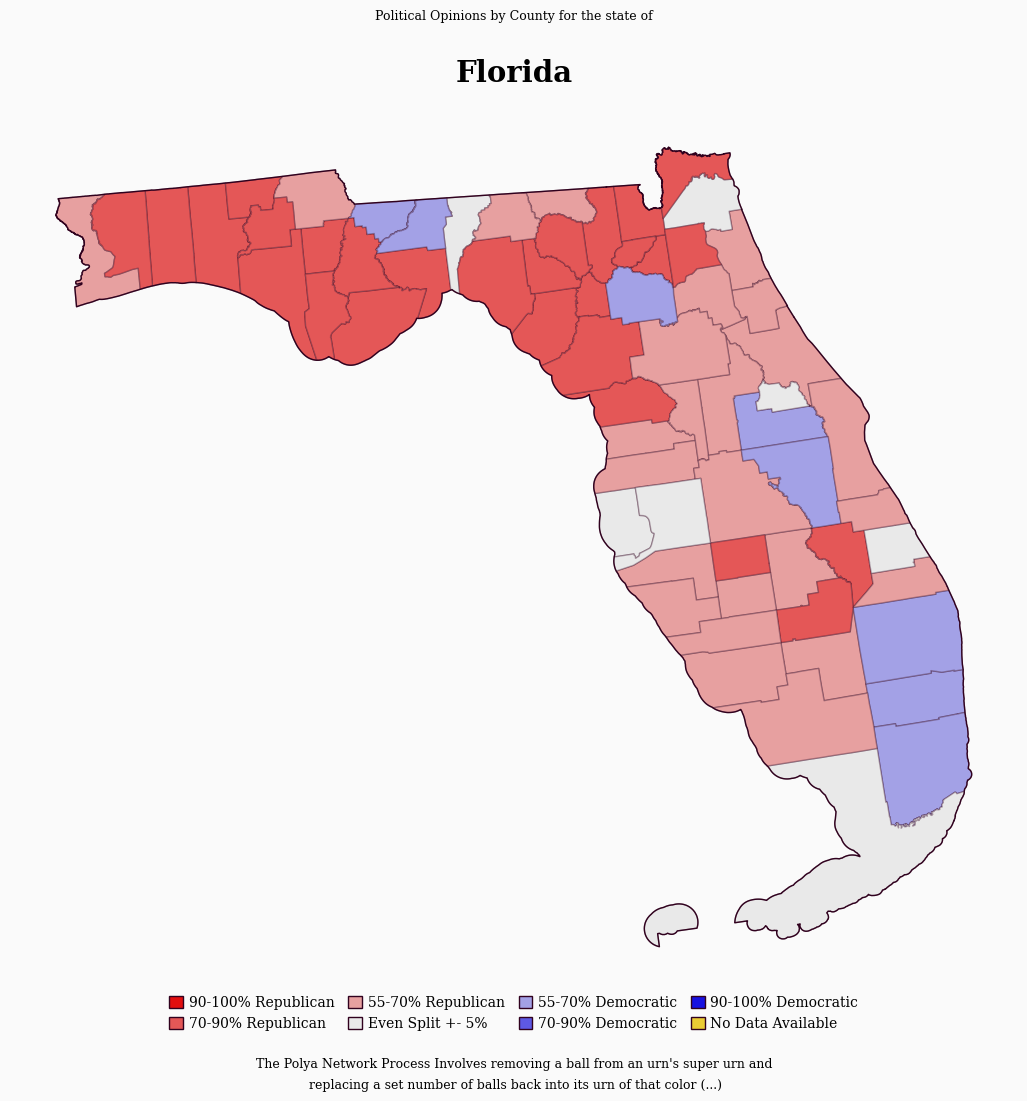

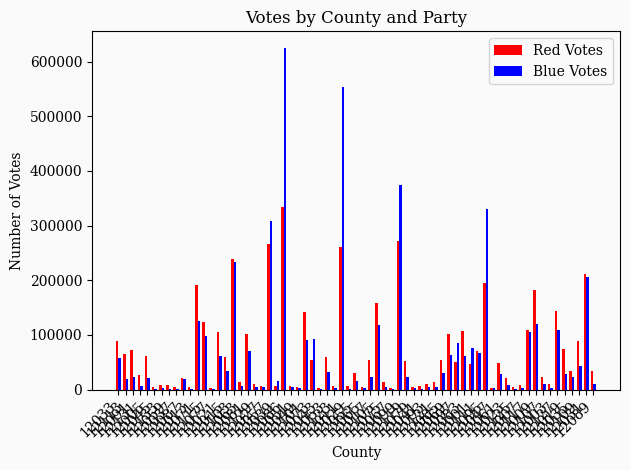

In [ ]:
#Display Graph Before Simulation
county_graph.visualize_map(title_size=21,legend_size=10,annotation_size=9,image_size=13,states="Florida")
#plt.savefig(f'pictures/map/Florida_1.png')
county_graph.graph_node_opinions("Florida")
#plt.savefig(f'pictures/graph/graph_1.png')

In [40]:

# county_graph, results = polya(county_graph,3000)
county_graph, results_raw = polya(county_graph,100)
results = {}
for k,v in results_raw.items():
    if k[0:2] == '50':
        results[k] = v
# county_graph.visualize_map(title_size=21,legend_size=10,annotation_size=9,image_size=13,states="Florida")
# plt.savefig(f'pictures/map/Florida_2.png')

for i in range(3,16):
    county_graph, results_raw = polya(county_graph,100)
    for k,v in results_raw.items():
        if k[0:2] == '50':
            results[k].extend(v)
    # county_graph.visualize_map(title_size=21,legend_size=10,annotation_size=9,image_size=13,states="Florida")
    # plt.savefig(f'pictures/map/Florida_{i}.png')
    
# county_graph.graph_node_opinions("Florida")
# plt.savefig('pictures/graph/graph_2.png')


In [28]:
results

{'12033': [{'choose': 'b', 'total': 146468, 'red ratio': 0.606330392986864},
  {'choose': 'r', 'total': 146666, 'red ratio': 0.6068618493720426},
  {'choose': 'r', 'total': 146865, 'red ratio': 0.6073945460116433},
  {'choose': 'r', 'total': 147064, 'red ratio': 0.6079258010118044},
  {'choose': 'r', 'total': 147263, 'red ratio': 0.6084556202168908},
  {'choose': 'r', 'total': 147462, 'red ratio': 0.6089840094397201},
  {'choose': 'b', 'total': 147662, 'red ratio': 0.6081591743305658},
  {'choose': 'b', 'total': 147863, 'red ratio': 0.6073324631584642},
  {'choose': 'r', 'total': 148064, 'red ratio': 0.6078655176140048},
  {'choose': 'r', 'total': 148265, 'red ratio': 0.6083971267662631},
  {'choose': 'b', 'total': 148466, 'red ratio': 0.6075734511605351},
  {'choose': 'r', 'total': 148668, 'red ratio': 0.6081066537519842},
  {'choose': 'r', 'total': 148870, 'red ratio': 0.60863840935044},
  {'choose': 'r', 'total': 149072, 'red ratio': 0.6091687238381454},
  {'choose': 'b', 'total': 1

In [ ]:
county_graph.visualize_map(title_size=21,legend_size=10,annotation_size=9,image_size=13)


In [ ]:
county_graph.graph_node_opinions("Florida")

['50003', '50025', '50021', '50001', '50027', '50007', '50013', '50023', '50017', '50011', '50015', '50005', '50019', '50009']


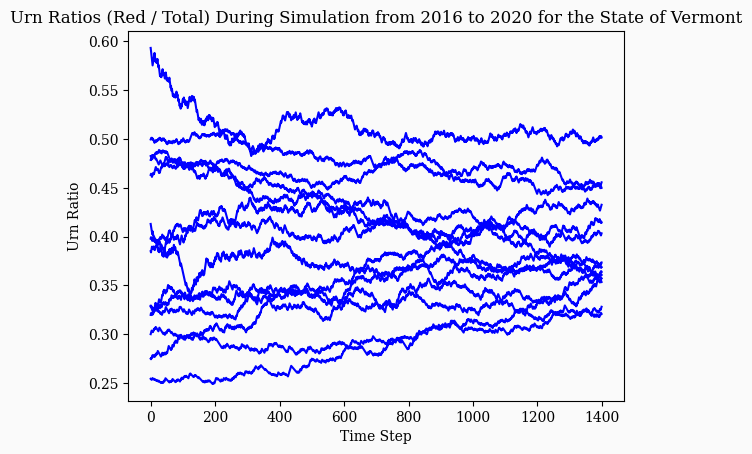

In [41]:
# Example data
x = list(range(0,len(results['50001'])))

county_keys = [k for k in results.keys() if k[0:2] == '50']

print(county_keys)
# print(results)

for k,v in results.items():
    y = [d['red ratio'] for d in results[k]]
    plt.plot(x, y, label='y = red ratio', color='blue', linestyle='-')


# Add labels, title, and legend
plt.xlabel('Time Step')
plt.ylabel('Urn Ratio')
plt.title('Urn Ratios (Red / Total) During Simulation from 2016 to 2020 for the State of Vermont')

plt.savefig('pictures/graph/line_plot.png')


#plt.legend()

# # Show the plot
# plt.grid(True)  # Optional: Add grid
# plt.show()